In [144]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar, linprog

KeyboardInterrupt: 

### Plot First Function

In [ ]:
def print_a_function(f, values):
    x = np.linspace(min(values), max(values), 100)
    y = f(x)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'Function: {f.__name__}')
    
    # Plot values on the function
    plt.scatter(values, [f(val) for val in values])

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Plot of the function {f.__name__}')
    plt.grid()
    plt.legend()
    plt.show()

In [174]:
#f = lambda x : (x - 1)**4 + x**2
#f.__name__ = 'f(x) = (x - 1)^4 + x^2'
#print_a_function(f, [-2, 3])

In [181]:
#dichotomous algorithm (bisection method)

def find_root_bisection(f, min_val, max_val):
    precision = 0.0001
    while abs(max_val - min_val) > precision:
        mid = (min_val + max_val) / 2.0
        if abs(f(mid)) < precision:
            return mid
        elif f(min_val) * f(mid) < 0:
            max_val = mid
        else:
            min_val = mid
    return mid


In [180]:
#TO REVIEWER: Ignore Gandalf for Newton's method, it works locally 

def find_root_newton_raphson(f, x0, x1, max_iter):
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        x_next = x1 - (fx1 * (x1 - x0)) / (fx1 - fx0)
        if abs(f(x_next)) < 1e-6:
            return x_next
        x0 = x1
        x1 = x_next
    return None #return none if not converged


In [182]:
#UNCOMMENT FOR TESTING

#f = lambda x: 4 * (x - 1)**3 + 2 * x #f'

#x0 = -2  #initial guess
#x1 = 2  #second guess
#max_iter = 1000  #maximum number of iterations
#root = find_root_bisection(f, -2, 2)
#print(root)

#discrepacy between bisection and newton raphson is less than 0.0006%
#root_newton = find_root_newton_raphson(f, x0, x1, max_iter)
#print(root_newton) 



0.41021728515625


### Brent's Algoright and Plots

x_min: 0.41, f(x_min): 0.29


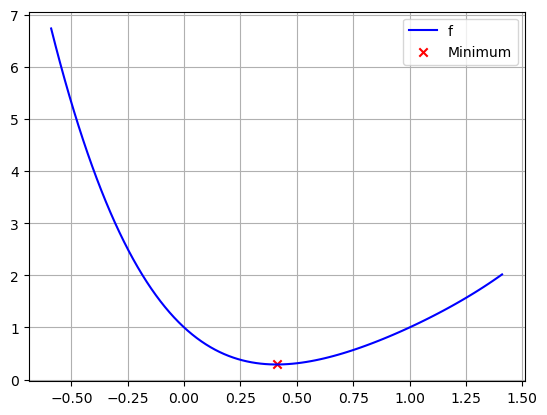

In [ ]:
#brent's algorithm

res = minimize_scalar(f, method='brent')
print('x_min: {:.2f}, f(x_min): {:.2f}'.format(res.x, res.fun))

# plot curve
x = np.linspace(res.x - 1, res.x + 1, 100)
y = [f(val) for val in x]
plt.plot(x, y, color='blue', label='f')

# plot optima
plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

plt.grid()
plt.legend(loc = 1)

### Gradient Descent Methods

In [ ]:
def gradient_descent(f, f_prime, start, learning_rate=0.1, precision=0.001, max_iter=1000): #iteration is limited to prevent infinite loop
    x = start
    for i in range(max_iter): 
        x = x - learning_rate * f_prime(x) #gradient = f_prime(x)
        if abs(f_prime(x)) < precision: #if achieved the minimum - stop
            break
    return x

In [ ]:
f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
f_min = f(x_min)

print('x_min: {:.2f}, f(x_min): {:.2f}'.format(x_min, f_min))

x_min: 0.41, f(x_min): 0.29


### Simplex Method

#### Solve Linear Problem

Maximize: z = x + 2y

Subject to:
2x + y ≤ 10 |
-4x + 5y ≤ 8 |
x - 2y ≤ 3 |
x, y ≥ 0

In [ ]:
def solve_linear_problem(A, b, c):
    result = linprog(c, A_ub=A, b_ub=b, method='highs') #simplex is depreciated, thus 'highs'
    optimal_value = result.fun #float optimal value of the function 
    optimal_arg = result.x #list of optimal arguments as 1-d array that minimizes the obj function while meeting constraints
    return optimal_value, optimal_arg

#### Initialize A, b, c and numpy arrays

In [ ]:
A = np.array([[2,1],[-4,5],[1,-2]]) #matrix [x,y] of each function - f(x) 10 = 2x + y | f(y) 8 = -4x + 5y | f(z) 3 = x - 2y
b = np.array([10,8,3]) #vector - function values
c = np.array([-1,-2]) #vector coefficients

In [ ]:
optimal_value, optimal_arg = solve_linear_problem(A, b, c)

print("The optimal value is:", optimal_value,"\nThe optimal arguments are:",optimal_arg)

The optimal value is: -11.0 
The optimal arguments are: [3. 4.]
